In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt

In [27]:
dataHW10=pd.read_excel('/Users/wenvennn/Downloads/Fire_Data.xlsx')

In [28]:
dataHW10

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [29]:
dataHW10['ACQ_TIME'] = dataHW10['ACQ_TIME'].astype(str).str.zfill(4)

In [30]:
dataHW10['ACQ_TIME'] = dataHW10['ACQ_TIME'].str.slice(stop=2)+':'+dataHW10['ACQ_TIME'].str.slice(start=2)

In [31]:
dataHW10['NEWTIME'] = pd.to_datetime(dataHW10['ACQ_DATE'].astype(str)+' '+dataHW10['ACQ_TIME'])

In [32]:
dataHW10.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME              object
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
NEWTIME       datetime64[ns]
dtype: object

In [33]:
dataHW10['NEWTIME']

0       2019-12-01 06:35:00
1       2019-12-01 06:35:00
2       2019-12-01 06:35:00
3       2019-12-01 06:35:00
4       2019-12-01 06:35:00
                ...        
79229   2020-04-04 20:03:00
79230   2020-04-04 20:03:00
79231   2020-04-04 20:03:00
79232   2020-04-04 20:03:00
79233   2020-04-04 20:03:00
Name: NEWTIME, Length: 79234, dtype: datetime64[ns]

In [35]:
dataHW10['delta']=dataHW10['NEWTIME']-dataHW10['NEWTIME'].iloc[0]
dataHW10['delmin']=(dataHW10['delta'].dt.total_seconds())/60
dataHW10

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,NEWTIME,delta,delmin
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,20:03,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,20:03,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,20:03,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,20:03,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0


In [36]:
dataHW10V2=dataHW10[dataHW10['NEWTIME'] <= (dataHW10['NEWTIME'].iloc[0]+pd.Timedelta(days=7))]
dataHW10V2

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,NEWTIME,delta,delmin
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,06:35,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,20.10502,100.32304,339.4,0.45,0.47,2019-12-08,06:05,N,VIIRS,n,1,298.2,8.0,0,2019-12-08 06:05:00,6 days 23:30:00,10050.0
809,810,20.10838,100.32633,344.4,0.45,0.47,2019-12-08,06:05,N,VIIRS,n,1,298.2,7.6,0,2019-12-08 06:05:00,6 days 23:30:00,10050.0
810,811,20.03892,99.95753,339.8,0.48,0.48,2019-12-08,06:05,N,VIIRS,n,1,299.3,5.2,0,2019-12-08 06:05:00,6 days 23:30:00,10050.0
811,812,19.15931,100.04431,341.4,0.49,0.49,2019-12-08,06:05,N,VIIRS,n,1,299.0,6.7,0,2019-12-08 06:05:00,6 days 23:30:00,10050.0


In [37]:
dataHW10V2 = dataHW10[["LATITUDE","LONGITUDE","delmin"]].head(813)
dataHW10V2

,LATITUDE,LONGITUDE,delmin
0,16.33696,98.70137,0.0
1,16.48906,98.73961,0.0
2,16.93571,99.06874,0.0
3,16.54092,98.59869,0.0
4,16.87473,98.63222,0.0
...,...,...,...
808,20.10502,100.32304,10050.0
809,20.10838,100.32633,10050.0
810,20.03892,99.95753,10050.0
811,19.15931,100.04431,10050.0


In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt

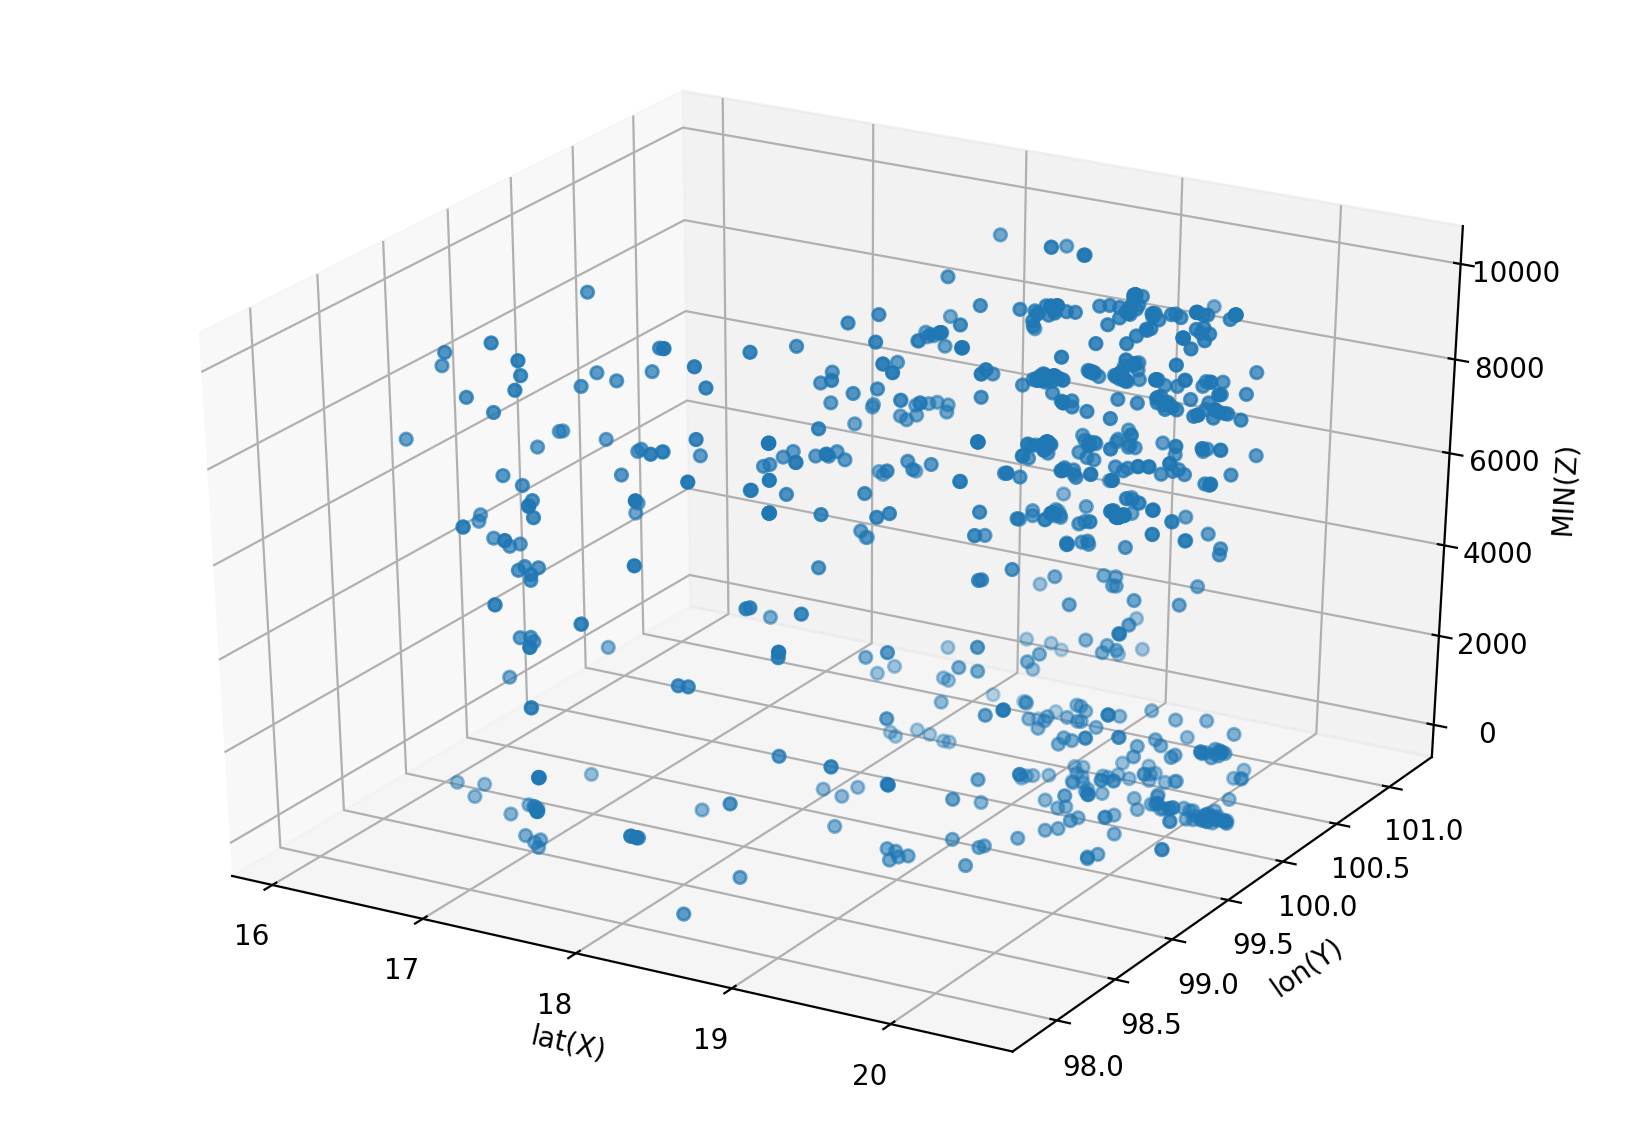

In [41]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=200

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
axe = Axes3D(fig)
axe.scatter(dataHW10V2['LATITUDE'], dataHW10V2['LONGITUDE'], dataHW10V2['delmin'])
axe.set_xlabel('lat(X)')
axe.set_ylabel('lon(Y)')
axe.set_zlabel('MIN(Z)')
plt.show()

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [44]:
day7 = np.array(dataHW10V2.values.tolist())
day7

array([[   16.33696,    98.70137,     0.     ],
       [   16.48906,    98.73961,     0.     ],
       [   16.93571,    99.06874,     0.     ],
       ...,
       [   20.03892,    99.95753, 10050.     ],
       [   19.15931,   100.04431, 10050.     ],
       [   19.58155,   100.0533 , 10050.     ]])

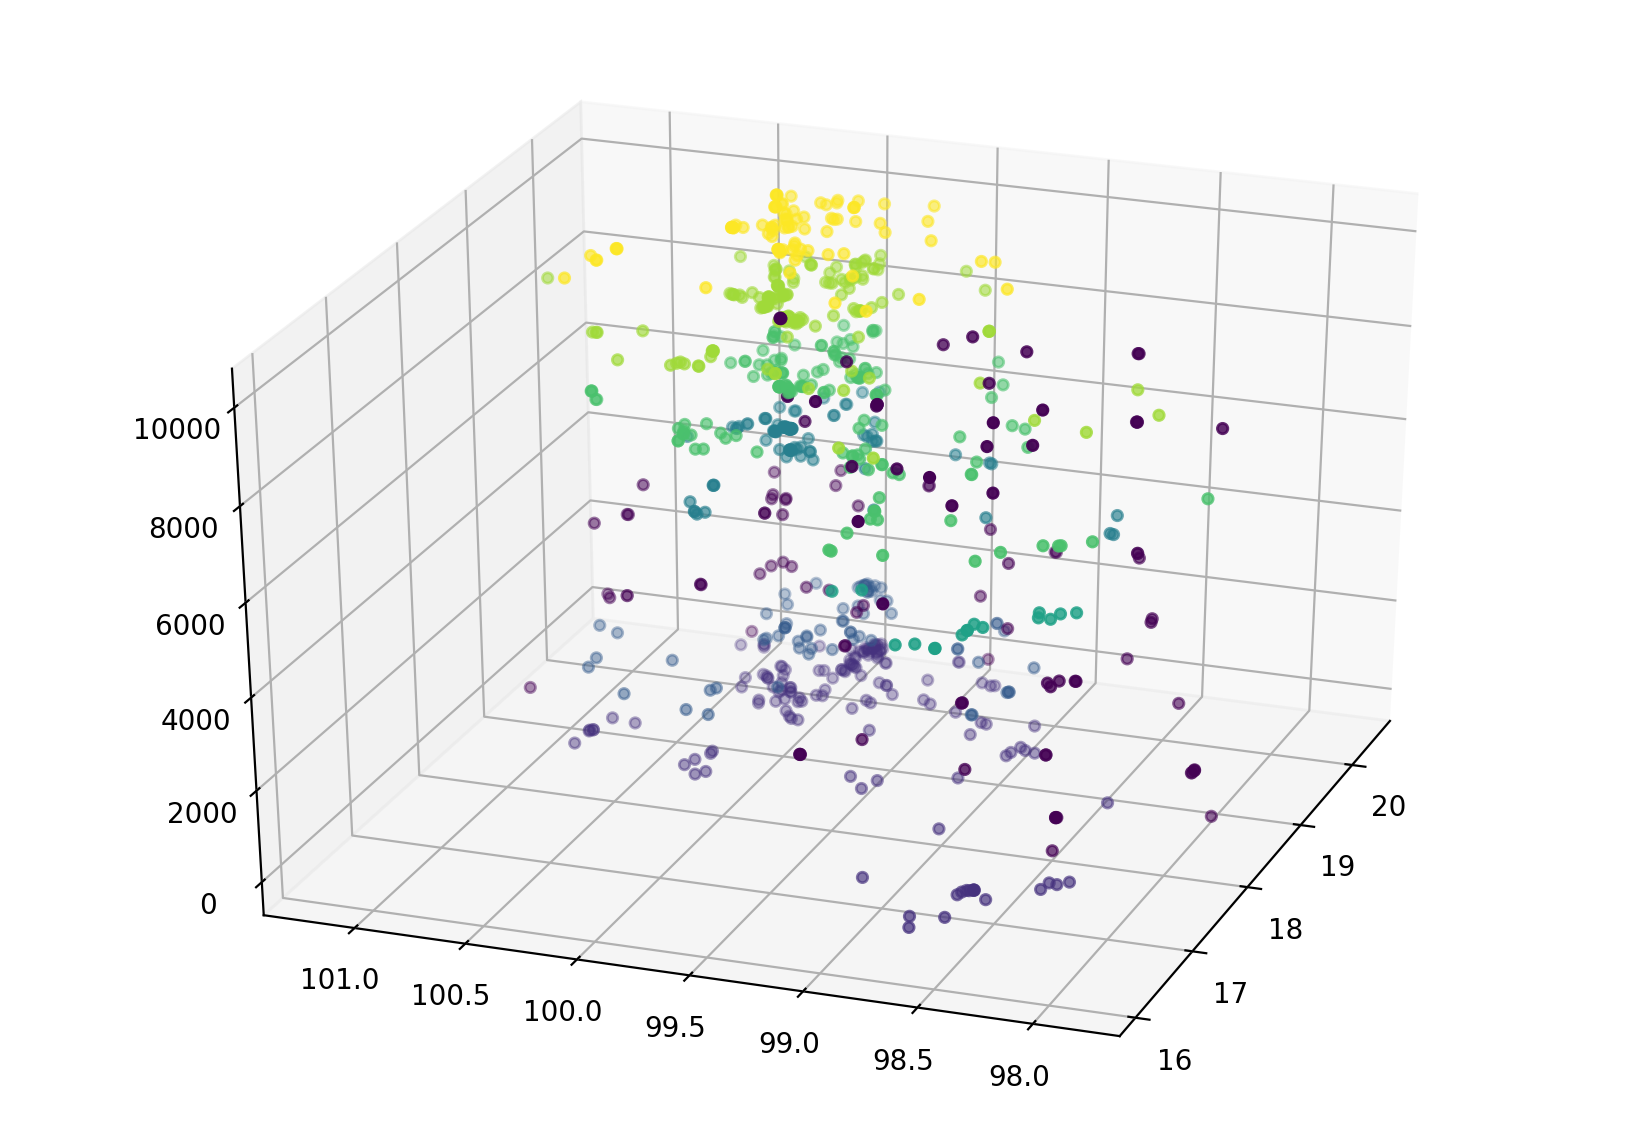

In [82]:
model = DBSCAN(eps=1.1, min_samples=15)
model.fit_predict(dataHW10V2)
pred = model.fit_predict(dataHW10V2)

fig = plt.figure()
axes = Axes3D(fig)
axes.scatter(day7[:,0], day7[:,1], day7[:,2], c=model.labels_, s=14)
axes.view_init(azim=200)
plt.show()

In [83]:
model_label = model.labels_


In [84]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(day7, model_label)

0.7452744115306318

#ใช้Density Based Spatial Clustering of Applications with Noise โดยกำหนดค่าดังนี้ eps = 1.1 
เนื่องจากแกน x,y แคบนอกจากนี้ยิ่งค่า eps น้อยก็ทำให้การพิจารณาความกว้างของข้อมูลน้อยไปด้วย และเลือก min_sample = 15 ทำให้จัดข้อมูลเป็นกลุ่มหากมีข้อมูลมากไปกว่า 15 ผลลัพธ์ ผลลัพธ์ได้ค่า Silhoulette score = 0.7452744115306318 หมายความว่าแบบจำลองค่อนชข้างดีแต่ยังไม่ดีมากเพราะค่าที่ได้ควรเข้าใกล้ 1 มากที่สุด สังเกตจากยังมีข้อมูลบางส่วนที่เป็นสีม่วงซึ่งถือว่าเป็น outliers
